In [ ]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('train_data.csv', dtype=str)

# Load the validation data
test_df = pd.read_csv('test_data.csv', dtype=str)

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# from sklearn.model_selection import train_test_split

# Split the training data
X_train = train_df.drop('Default', axis=1)
y_train = train_df['Default']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)
print(X_val.dtypes)

LoanID                   object
Age                      object
Income                   object
LoanAmount               object
CreditScore              object
MonthsEmployed           object
NumCreditLines           object
InterestRate             object
LoanTerm                 object
DTIRatio                 object
Education                object
EmploymentType           object
MaritalStatus            object
HasMortgage              object
HasDependents            object
HasCoSigner              object
LoanPurpose_Auto         object
LoanPurpose_Business     object
LoanPurpose_Education    object
LoanPurpose_Home         object
LoanPurpose_Other        object
dtype: object
LoanID                   object
Age                      object
Income                   object
LoanAmount               object
CreditScore              object
MonthsEmployed           object
NumCreditLines           object
InterestRate             object
LoanTerm                 object
DTIRatio                 o

In [ ]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_val = X_val.apply(pd.to_numeric, errors='coerce')

In [ ]:
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,...,1,1,0,0,0,1,0,0,0,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,...,2,0,1,0,0,0,1,0,0,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,...,3,0,0,1,0,0,0,0,1,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,...,1,1,0,1,1,0,0,0,0,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,...,1,0,1,1,0,0,1,0,0,0


In [ ]:
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,...,3,1,1,1,0,0,0,0,1,0
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,...,2,2,1,1,1,0,0,1,0,0
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,...,2,3,1,1,1,0,0,1,0,0
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,...,2,1,0,0,1,0,1,0,0,0
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,...,1,1,0,1,1,0,1,0,0,0


Accuracy: 0.884007244957901
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     36105
           1       0.62      0.01      0.01      4751

    accuracy                           0.88     40856
   macro avg       0.75      0.50      0.48     40856
weighted avg       0.85      0.88      0.83     40856

ROC AUC Score: 0.7250827477599232


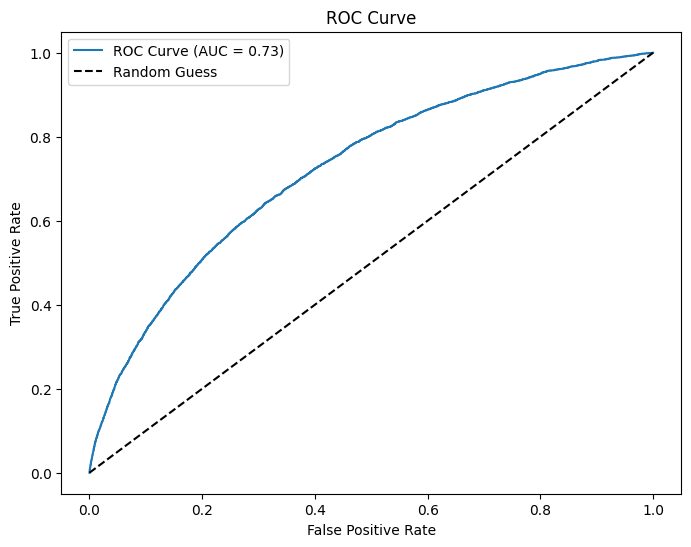

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv('train_data.csv')  # Replace with actual file path
test_df = pd.read_csv('test_data.csv')    # Replace with actual file path

# Preprocessing
# Drop LoanID as it's not a useful feature
train_df.drop(columns=['LoanID'], inplace=True)
test_df.drop(columns=['LoanID'], inplace=True)

# Separate features and target
X = train_df.drop(columns=['Default'])
y = train_df['Default']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)

# Validation Predictions and Evaluation
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_proba))

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_val, y_val_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Test Predictions
test_predictions = model.predict(test_df)

# Save predictions
test_df['Default'] = test_predictions
test_df[['Default']].to_csv('test_predictions.csv', index=False)


# Handle Imbalance with Class Weights

A Logistic Regression model with class weight=’balanced’ was implemented.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# Logistic Regression with class weights
model = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Validation Predictions
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_val_proba))


Accuracy: 0.6683473663598982
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     36105
           1       0.21      0.67      0.32      4751

    accuracy                           0.67     40856
   macro avg       0.57      0.67      0.55     40856
weighted avg       0.85      0.67      0.73     40856

ROC AUC Score: 0.7297508194471614


This gave a worse validation accuracy, so we won't be proceeding in this direction 

# Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
scaled_model = Pipeline(steps=[
    ('scaler', scaler),
    ('logistic', LogisticRegression(solver='lbfgs', max_iter=200))
])


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__C': [0.1, 1, 10],
    'logistic__penalty': ['l1', 'l2']
}

random_search = RandomizedSearchCV(
    estimator=scaled_model,  # Pipeline object
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END logistic__C=10, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.1s
[CV] END logistic__C=10, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=10, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=10, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=10, logistic__penalty=l2, logistic__solver=liblinear; total time=   0.2s
[CV] END logistic__C=10, logistic__penalty=l1, logistic__solver=saga; total time=   1.0s
[CV] END logistic__C=10, logistic__penalty=l1, logistic__solver=saga; total time=   0.8s
[CV] END logistic__C=10, logistic__penalty=l1, logistic__solver=saga; total time=   1.0s
[CV] END logistic__C=10, logistic__penalty=l1, logistic__solver=saga; total time=   0.9s
[CV] END logistic__C=10, logistic__penalty=l1, logistic__solver=saga; total time=   1.0s
[CV] END logistic__C=0.1

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression(max_iter=200))]),
                   param_distributions={'logistic__C': [0.1, 1, 10],
                                        'logistic__penalty': ['l1', 'l2'],
                                        'logistic__solver': ['liblinear',
                                                             'saga']},
                   random_state=42, verbose=2)

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC on Training Data:", random_search.best_score_)

Best Parameters: {'logistic__solver': 'saga', 'logistic__penalty': 'l2', 'logistic__C': 1}
Best ROC AUC on Training Data: 0.8848189666319921


In [ ]:
test_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Default
0,55,112656,92393,581,113,2,23.54,36,0.15,4,...,1,1,1,0,0,0,0,1,0,0
1,56,91569,131575,641,54,1,15.19,12,0.43,1,...,2,1,1,1,0,0,1,0,0,0
2,26,78169,75417,569,105,3,18.02,12,0.29,3,...,3,1,1,1,0,0,1,0,0,0
3,26,63033,10804,326,118,1,14.71,24,0.41,1,...,1,0,0,1,0,1,0,0,0,0
4,24,29665,21182,662,102,3,15.02,60,0.69,4,...,1,0,1,1,0,1,0,0,0,0


In [ ]:
test1_df = pd.read_csv('test_data.csv', dtype=str)

In [ ]:
# Apply the best model to the test data
X_test = test_df.drop(columns=['Default'])  # Drop the target column 'Default' from test set
y_test_pred = random_search.best_estimator_.predict(X_test)

# Prepare the submission dataframe using 'LoanID' as the ID column
submission = pd.DataFrame({
    'LoanID': test1_df['LoanID'],  # Use 'LoanID' as the unique identifier
    'Prediction': y_test_pred
})

# Save to CSV
submission.to_csv('submission_logistic.csv', index=False)

print("Submission file created: submission_logistic.csv")


Submission file created: submission_logistic.csv


L1 regularization was explored using the liblinear solver.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Logistic Regression with L2 regularization (Ridge)
model = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

# Hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200, 500]
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on training data to check validation accuracy
y_train_pred = best_model.predict(X_train)
validation_accuracy = accuracy_score(y_train, y_train_pred)
print("Validation Accuracy after tuning with Logistic Regression (L2):", validation_accuracy)

# Predict on test data for submission
y_test_pred = best_model.predict(X_test)

# Prepare the submission dataframe (replace 'ID' with the actual column in your test_df)
submission = pd.DataFrame({
    'LoanID': test1_df['LoanID'],  # Assuming the 'LoanID' column is your identifier for test data
    'Default': y_test_pred
})

# Save the submission to CSV
submission.to_csv('submission_L2_logistic.csv', index=False)

print("Submission file 'submission_L2_logistic.csv' has been generated.")



L1 regularization was explored using the liblinear solver.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Logistic Regression with L1 regularization (Lasso)
model_l1 = LogisticRegression(solver='liblinear')  # 'liblinear' works well with small datasets

# Hyperparameter grid for L1 regularization
param_grid_l1 = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1'],  # L1 regularization (Lasso)
    'max_iter': [100, 200, 500]
}

grid_search_l1 = GridSearchCV(model_l1, param_grid_l1, cv=5, scoring='accuracy', verbose=1)
grid_search_l1.fit(X_train, y_train)

# Best L1 model
best_model_l1 = grid_search_l1.best_estimator_

# Predict on training data to check validation accuracy for L1 model
y_train_pred_l1 = best_model_l1.predict(X_train)
validation_accuracy_l1 = accuracy_score(y_train, y_train_pred_l1)
print("Validation Accuracy after tuning with Logistic Regression (L1):", validation_accuracy_l1)

# Predict on test data for submission with L1 model
y_test_pred_l1 = best_model_l1.predict(X_test)

# Prepare the submission dataframe for L1
submission_l1 = pd.DataFrame({
    'LoanID': test1_df['LoanID'],  # Assuming the 'LoanID' column is your identifier for test data
    'Default': y_test_pred_l1
})

# Save the submission for L1
submission_l1.to_csv('submission_L1_logistic.csv', index=False)
print("Submission file 'submission_L1_logistic.csv' has been generated.")




Logistic Regression with ElasticNet penalty was implemented using the
saga solver.
Hyperparameters tuned included regularization strength (C) and mixing
ratio (l1 ratio).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with ElasticNet regularization (simplified grid search)
model_en = LogisticRegression(solver='saga', penalty='elasticnet')

# Simpler hyperparameter grid
param_grid_en = {
    'C': [1, 10],  # Reduced regularization strength values
    'l1_ratio': [0.5],  # Focus on a single value for ElasticNet mixing ratio
    'max_iter': [1000],  # Increased max_iter for better convergence
}

# GridSearchCV setup
grid_search_en = GridSearchCV(model_en, param_grid_en, cv=5, scoring='accuracy', verbose=1)
grid_search_en.fit(X_train_scaled, y_train)

# Best ElasticNet model
best_model_en = grid_search_en.best_estimator_

# Predict on test data for submission with ElasticNet model
y_test_pred_en = best_model_en.predict(X_test_scaled)

# Prepare the submission dataframe for ElasticNet
submission_en = pd.DataFrame({
    'LoanID': test1_df['LoanID'],
    'Default': y_test_pred_en
})

# Save the submission for ElasticNet
submission_en.to_csv('submission_ElasticNet_logistic.csv', index=False)
print("Submission file 'submission_ElasticNet_logistic.csv' has been generated.")


L1 regularization was explored using the liblinear solver(implementation 2).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with L1 regularization
model_l1 = LogisticRegression(solver='liblinear', penalty='l1')

# Refined hyperparameter grid for L1 regularization
param_grid_l1 = {
    'C': [0.1, 1, 10],  # Finer search for regularization strength
    'max_iter': [200, 500]  # Tweaking max_iter to improve convergence
}

# GridSearchCV setup for L1
grid_search_l1 = GridSearchCV(model_l1, param_grid_l1, cv=5, scoring='accuracy', verbose=1)
grid_search_l1.fit(X_train_scaled, y_train)

# Best L1 model
best_model_l1 = grid_search_l1.best_estimator_

# Predict on test data for submission
y_test_pred_l1 = best_model_l1.predict(X_test_scaled)

# Prepare the submission dataframe for L1 model
submission_l1 = pd.DataFrame({
    'LoanID': test1_df['LoanID'],
    'Default': y_test_pred_l1
})

# Save the submission file
submission_l1.to_csv('submission_L1_logistic_2.csv', index=False)
print("Submission file 'submission_L1_logistic_2.csv' has been generated.")
